# Salary Prediction Project EDA: What leads to a higher salary ?

In [1]:
#personal info
__author__ = "Cici Du"
__email__ = "ciciechodu@gmail.com"

### Define the problem

The goal of this project is to predict salaries based on certain criteria such as education background, location relative to metropolises and years of work experience, etc.

#### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the data

In [3]:
train_salary = pd.read_csv('data/train_salaries.csv')
train_features = pd.read_csv('data/train_features.csv')
test_features = pd.read_csv('data/test_features.csv')

### Examine the data

In [4]:
train_salary.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [5]:
train_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [6]:
test_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [7]:
train_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [8]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [9]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


We see the data types are as expected and there are zero null values in our datasets.

### Clean the data

#### Check for duplicates

In [10]:
train_salary.duplicated().sum()

0

In [11]:
train_features.duplicated().sum()

0

In [12]:
test_features.duplicated().sum()

0

#### Merge the data 

In [13]:
train_df = pd.merge(train_salary, train_features, how='inner', on='jobId')

In [14]:
train_df.head()

,jobId,salary,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,130,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,101,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,137,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,142,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,163,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [15]:
#after the merge, the jobid column has no value, so we drop it
train_df = train_df.drop(['jobId'], axis = 1)
train_df.head()

,salary,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,130,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,101,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,137,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,142,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,163,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


### Examine and visualize the target and features

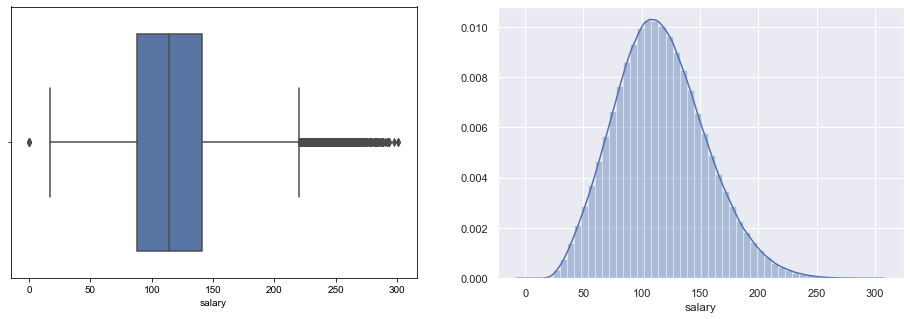

In [16]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.set(style = 'darkgrid')
sns.boxplot(train_df.salary)
plt.subplot(1,2,2)
sns.distplot(train_df.salary);
plt.savefig("target.png")

In [17]:
#from the boxplot above, we see several records with salary = 0
train_df.loc[train_df['salary'] == 0]

,salary,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
30559,0,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7
495984,0,COMP34,JUNIOR,NONE,NONE,OIL,1,25
652076,0,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60
816129,0,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6
828156,0,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29


In [18]:
#drop these records from the dataset as they are invalid
train_df = train_df.loc[train_df['salary'] > 0]
train_df.shape

(999995, 8)

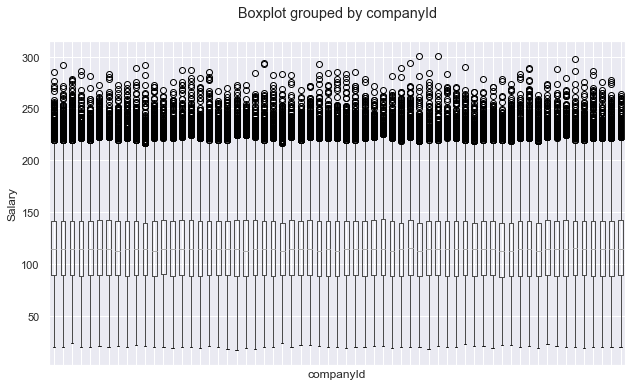

In [19]:
#check if companyid has a big impact 
train_df.boxplot(column='salary',by='companyId',figsize = (10,6)) 
plt.ylabel('Salary')
plt.title(None)
plt.tick_params(axis='x',labelbottom=False);

In [20]:
#There's no obvious relationship between salary and company Id, so we drop this column
train_df = train_df.drop(['companyId'], axis = 1)
train_df.head()

,salary,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,130,CFO,MASTERS,MATH,HEALTH,10,83
1,101,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,137,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,142,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,163,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [21]:
#Identify the numerical and categorical variables
train_df.columns

Index(['salary', 'jobType', 'degree', 'major', 'industry', 'yearsExperience',
       'milesFromMetropolis'],
      dtype='object')

In [22]:
num_col=['yearsExperience', 'milesFromMetropolis']
cat_col=['jobType', 'degree', 'major', 'industry']

#### Summarize the target,  numerical and categorical variables

In [23]:
train_df.describe(include = [np.number])

,salary,yearsExperience,milesFromMetropolis
count,999995.000000,999995.000000,999995.000000
mean,116.062398,11.992407,49.529381
std,38.717163,7.212390,28.877721
min,17.000000,0.000000,0.000000
25%,88.000000,6.000000,25.000000
50%,114.000000,12.000000,50.000000
75%,141.000000,18.000000,75.000000
max,301.000000,24.000000,99.000000


In [24]:
train_df.describe(include = ['O'])

,jobType,degree,major,industry
count,999995,999995,999995,999995
unique,8,5,9,7
top,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,125886,236975,532353,143205


In [25]:
def sorted_boxplot(df, by, column, rot=0):
    df_temp = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    median = df_temp.median().sort_values()
    return df_temp[median.index].boxplot(rot= rot, return_type = 'axes')

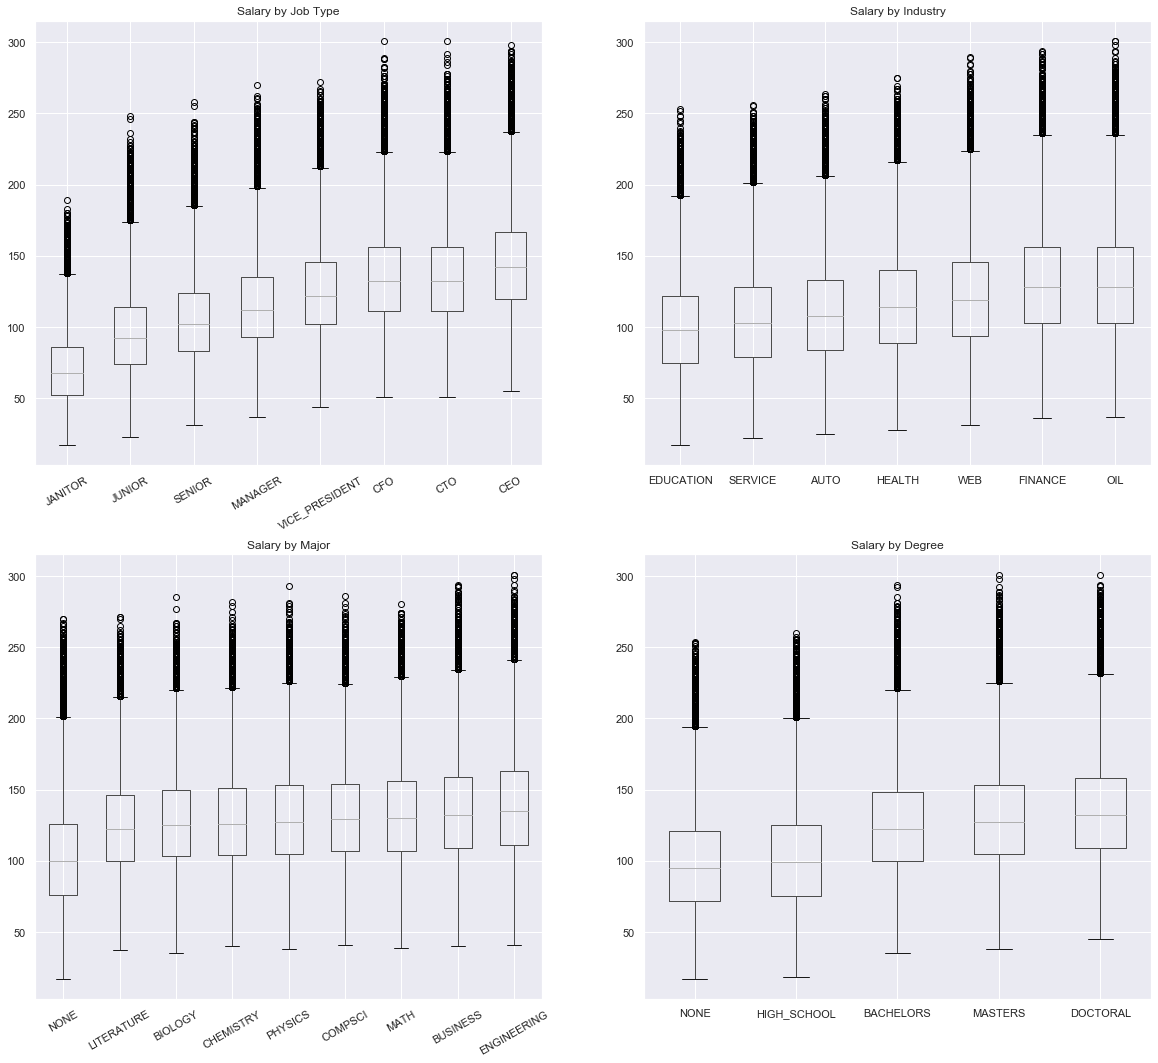

In [28]:
plt.figure(figsize=(20,18))
plt.subplot(2,2,1)
plt.title('Salary by Job Type')
sorted_boxplot(train_df, column = 'salary', by = 'jobType', rot=30)

plt.subplot(2,2,2)
plt.title('Salary by Industry')
sorted_boxplot(train_df, column = 'salary', by = 'industry')

plt.subplot(2,2,3)
plt.title('Salary by Major')
sorted_boxplot(train_df, column = 'salary', by = 'major', rot=30)

plt.subplot(2,2,4)
plt.title('Salary by Degree')
sorted_boxplot(train_df, column = 'salary', by = 'degree')
plt.savefig("feature.png")

From these boxplots, we see:

1) There is a positive relationship between job type and salary.

2) In terms of industries, education and service indusries pay the least; auto, health and web are in the middle; finance and oil industries tend to pay the highest salaries. 

3) When it comes to majors, engineering and business lead to the highest salaries. 

4) Having an advanced degree leads to higher pay. Having a Bachelor's degree makes the biggest difference.

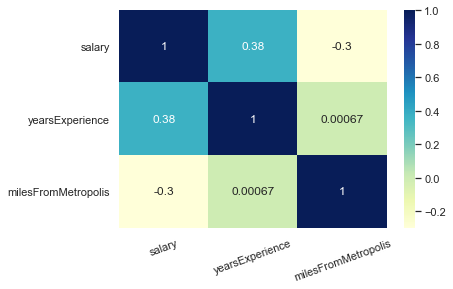

In [27]:
#explore correlation of the numerical features
corr = train_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="YlGnBu",
            annot = True)
plt.xticks(rotation = 20);
plt.savefig("correlation.png")

We see that years of experience has a positive relationship with salary and miles from metropolis has a negative relationship with salary.This observation matchs with our intuitions that having more experience leads to higher salaries and jobs closer to the metropolis pay more than jobs further away.